In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score

In [2]:
digits= load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [6]:
digits.data.shape

(1797, 64)

In [9]:
digits.images.shape

(1797, 8, 8)

In [12]:
def plot_digits(data):
    fig, axes = plt.subplots(4,5
                           ,figsize=(6,5)
                           ,subplot_kw={"xticks":[],"yticks":[]}
                           )
    for i, axe in enumerate(axes.ravel()):
        axe.imshow(data[i,:].reshape(8,8),cmap='binary')

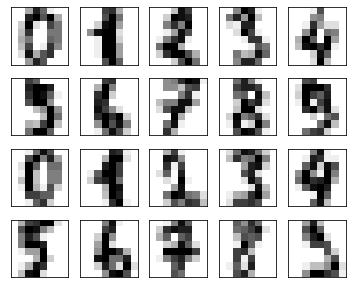

In [13]:
plot_digits(digits.data)

In [15]:
data_noise = np.random.normal(digits.data,2)

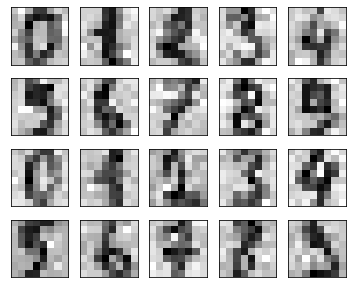

In [16]:
plot_digits(data_noise)

In [23]:
pca = PCA(0.7,svd_solver='full')
data_noise_dr = pca.fit_transform(data_noise)

In [24]:
data_noise_inverse = pca.inverse_transform(data_noise_dr)

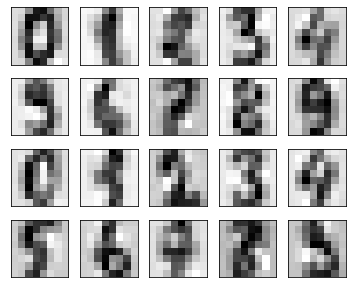

In [25]:
plot_digits(data_noise_inverse)

In [30]:
data = pd.read_csv(r"E:\machine learning\Preprocessing and feature selection\digit recognizer.csv")

In [31]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data.shape

(42000, 785)

In [36]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [37]:
pca_line = PCA().fit(x)

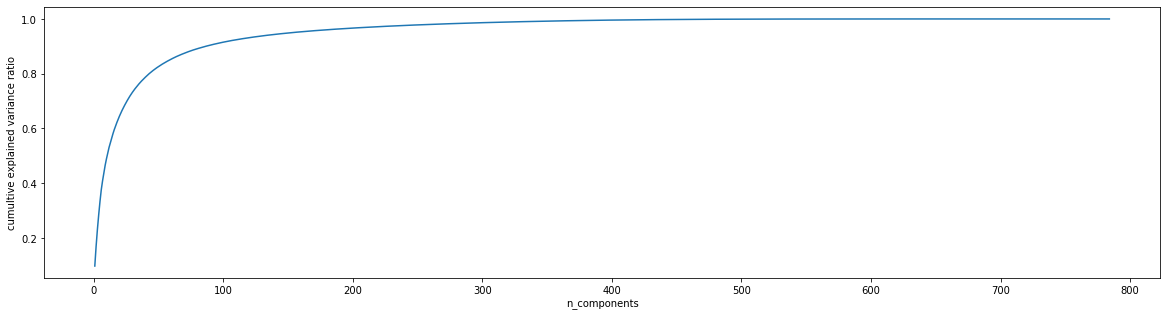

In [40]:
plt.figure(figsize=(20,5))
plt.plot(range(1,785),np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('cumultive explained variance ratio')
plt.show()

In [41]:
pca  = PCA(n_components=300)
x_dr = pca.fit_transform(x)

In [42]:
cross_val_score(RFC(n_estimators=100,random_state=10),x_dr,y,cv=5).mean()

0.9328814455183314

In [ ]:
#%%timeit